# AM3strokes

#### Project description:
_A 3 strokes vertical apparent motion is presented left or right of fixation. <br />
Participants are instructed to saccadeto saccade to the perceived last stroke._

#### Hypothesis: 
_Participants mislocalize the 3rd stroke in the direction of the motion_

#### Eye movement data analysis:

- [x] Saccade analysis output graph
- [x] Saccade parameter graph
- [x] Saccade landing graph
- [x] Sacade landing map per trial sequence
- [x] Saccade y landing distribution (2 rows x 2 columns)
- [x] Saccade y landing distribution per incremental runs (2 rows x 2 columns) 

In [140]:
# Imports
import os
import numpy as np
import pandas as pd
import ipdb
from scipy.stats import norm, linregress

# figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from plot_utils import plotly_template
import plotly.express as px

In [141]:
# Define folders
base_dir = '/home/mzid/codes/am3strokes/'
data_dir = '/home/mzid/codes/am3strokes/data'
subject = 'sub-13'
fig_dir = '{data_dir}/{subject}/figures'.format(data_dir=data_dir, subject=subject)

In [142]:
# Save dataframe
df_all = pd.read_csv('{data_dir}/{subject}/add/{subject}_task-AM3strokes_data.csv'.format(data_dir=data_dir,subject=subject)) 

#### Saccade analysis output graph

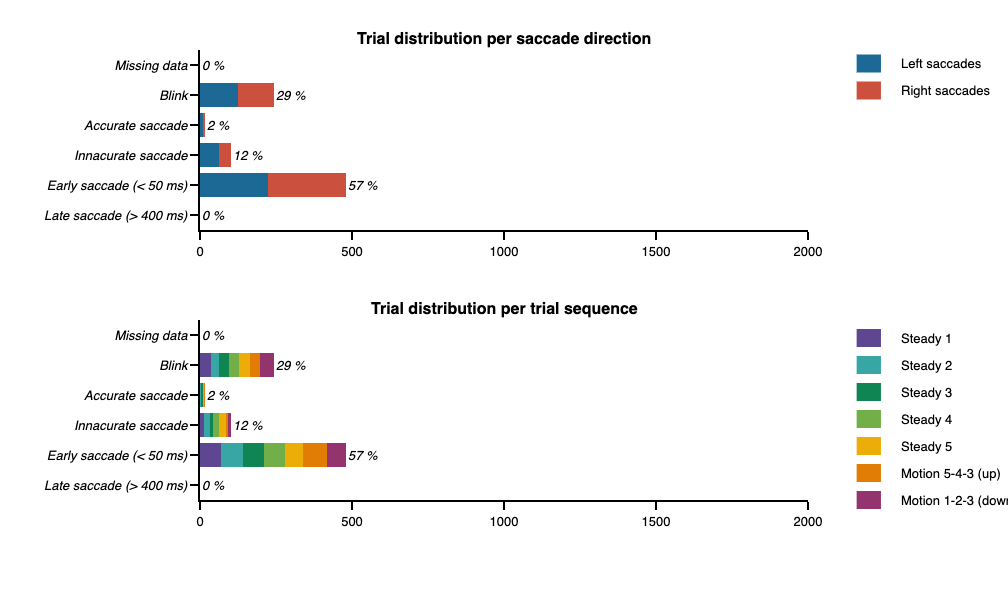

In [143]:
# general figure settings
template_specs = dict(  axes_color="rgba(0, 0, 0, 1)",
                        axes_width=2,
                        axes_font_size=13,
                        bg_col="rgba(255, 255, 255, 1)",
                        font='Helvetica',
                        title_font_size=15,
                        plot_width=1.5)
fig_template = plotly_template(template_specs)

# figure specific settings
x_range = [0,2000]
colors_panel = px.colors.qualitative.Prism
subplot_titles = ('<b>Trial distribution per saccade direction<b>','<b>Trial distribution per trial sequence<b>')
analysis_crit = ['<i>Missing data<i>', '<i>Blink<i>', '<i>Accurate saccade<i>', #'<i>Corrective saccade<i>', 
                 '<i>Innacurate saccade<i>','<i>Early saccade (< 50 ms)<i>','<i>Late saccade (> 400 ms)<i>']
analysis_crit_df = ['miss_time_trial','blink_trial','main_sac_trial',#'cor_sac_trial',
                    'innacurate_sac_trial','early_sac_trial','late_sac_trial']
x_label='Trials'
tss = ['Steady 1', 'Steady 2', 'Steady 3', 'Steady 4', 'Steady 5', 'Motion 5-4-3 (up)', 'Motion 1-2-3 (down)']
sds = ['Left saccades', 'Right saccades']
ts_cols = [colors_panel[0], colors_panel[2], colors_panel[3], colors_panel[4], colors_panel[5], colors_panel[6], colors_panel[8]]
sd_cols = [colors_panel[1], colors_panel[7]]
x_legend = 1.15
y_legend_step = 0.06
y_legend_sd = 0.97
y_legend_ts = 0.36
rad_leg = 0.04

# subplot settings
rows, cols = 2, 1
fig_height, fig_width = 600,800
column_widths,row_heights = [1],[1,1]
sb_specs = [[{}],[{}]]
fig = make_subplots(rows=rows, cols=cols, specs=sb_specs, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.05, 
                    column_widths=column_widths, row_heights=row_heights, shared_yaxes=True, subplot_titles=subplot_titles)

# Right / Left saccades
# ---------------------
for sd_num, sd in enumerate(sds):
    # plot
    fig.append_trace(go.Bar(y=analysis_crit, x=df_all.loc[(df_all.saccade_direction == sd_num+1)][analysis_crit_df].sum(), 
                            orientation='h', name=sd, marker_color=sd_cols[sd_num]),row=1, col=1)
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_sd-y_legend_step*sd_num, 
                       text=sd, showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=sd_cols[sd_num],line_width=0,
                  x0=x_legend-0.05-rad_leg/2, y0=y_legend_sd-y_legend_step*sd_num-rad_leg/2, 
                  x1=x_legend-0.05+rad_leg/2, y1=y_legend_sd-y_legend_step*sd_num+rad_leg/2)
    
# annotation value
for num_crit, crit_name in enumerate(analysis_crit_df):
    fig.add_annotation(x=df_all[crit_name].sum(), y=num_crit, text='<i>{:1.0f} %<i>'.format(df_all[crit_name].mean()*100), 
                       showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', row=1, col=1)

# Trials sequence
# ---------------
for ts_num, ts in enumerate(tss):
    # plot
    fig.append_trace(go.Bar(y=analysis_crit, x=df_all.loc[(df_all.trial_sequence == ts_num+1)][analysis_crit_df].sum(), 
                            orientation='h', name=ts, marker_color=ts_cols[ts_num]),row=2, col=1)
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_ts-(y_legend_step*ts_num), 
                       text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0,
                  x0=x_legend-0.05-rad_leg/2, y0=y_legend_ts-y_legend_step*ts_num-rad_leg/2, 
                  x1=x_legend-0.05+rad_leg/2, y1=y_legend_ts-y_legend_step*ts_num+rad_leg/2)

for num_crit, crit_name in enumerate(analysis_crit_df):
    fig.add_annotation(x=df_all[crit_name].sum(), y=num_crit, text='<i>{:1.0f} %<i>'.format(df_all[crit_name].mean()*100), 
                       showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', row=2, col=1)


# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=x_range, row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], autorange="reversed", row=row+1, col=col+1)
    
# Save figure
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=200, margin_r=200, margin_t=50, margin_b=100, barmode='stack', showlegend=False)
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)    
fig.write_image('{}/{}_trial_dist.pdf'.format(fig_dir, subject))

#### Saccade parameter graph

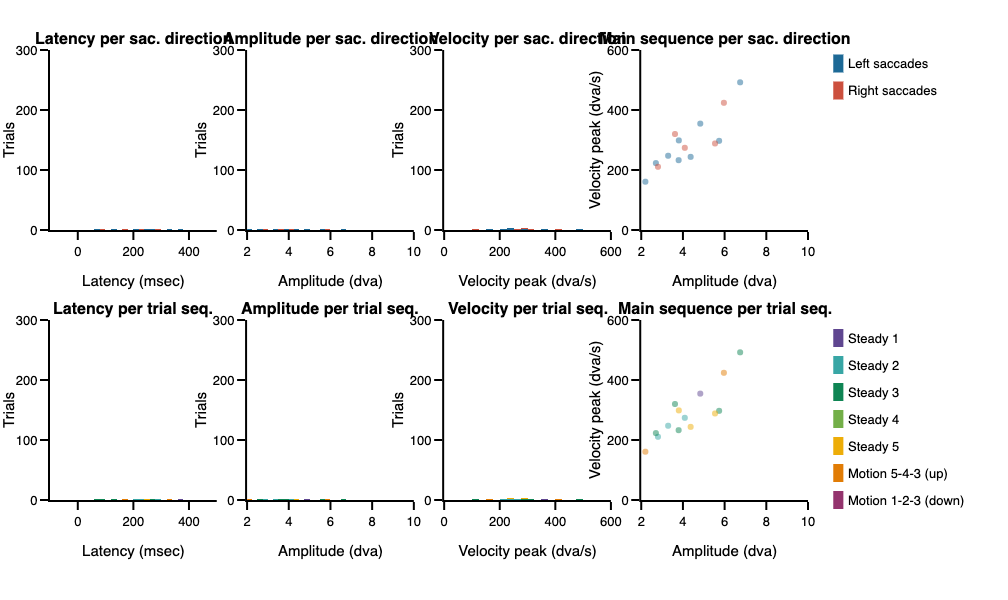

In [144]:
# figure specific settings
subplot_titles = ('<b>Latency per sac. direction<b>', '<b>Amplitude per sac. direction<b>', '<b>Velocity per sac. direction<b>', '<b>Main sequence per sac. direction<b>',
                  '<b>Latency per trial seq.<b>', '<b>Amplitude per trial seq.<b>', '<b>Velocity per trial seq.<b>', '<b>Main sequence per trial seq.<b>',)
# subplot settings
rows, cols = 2, 4
leg_mergin = 200
fig_height, fig_width = 600,350*4+leg_mergin
column_widths,row_heights = [1,1,1,1],[1,1]
sb_specs = [[{},{},{},{}],[{},{},{},{}]]
fig = make_subplots(rows=rows, cols=cols, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.04, 
                    column_widths=column_widths, row_heights=row_heights, subplot_titles=subplot_titles)

x_legend = 1.05
y_legend_step = 0.06
y_legend_sd = 0.97
y_legend_ts = 0.36
rad_leg = 0.04

# Right / Left saccades
# ---------------------
for sd_num, sd in enumerate(sds):
    # plot
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_lat_trial'], name=sd, marker_color=sd_cols[sd_num], xbins_size = 20),row=1, col=1)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_amp_trial'], name=sd, marker_color=sd_cols[sd_num], xbins_size = 0.25),row=1, col=2)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_vpeak_trial'], name=sd, marker_color=sd_cols[sd_num], xbins_size = 25),row=1, col=3)
    fig.append_trace(go.Scatter(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_amp_trial'],
                                y=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]['sac_vpeak_trial'],name=sd, mode='markers',marker_color=sd_cols[sd_num],
                                line_width=0, opacity=0.5
                               ),row=1, col=4)
    
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_sd-y_legend_step*sd_num, 
                       text=sd, showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=sd_cols[sd_num],line_width=0,
                  x0=x_legend-0.01-rad_leg/6, y0=y_legend_sd-y_legend_step*sd_num-rad_leg/2, 
                  x1=x_legend-0.01+rad_leg/6, y1=y_legend_sd-y_legend_step*sd_num+rad_leg/2)

# Trials sequence
# ---------------
for ts_num, ts in enumerate(tss):
    # plot
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_lat_trial'], name=ts, marker_color=ts_cols[ts_num], xbins_size = 20),row=2, col=1)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_amp_trial'], name=ts, marker_color=ts_cols[ts_num], xbins_size = 0.25),row=2, col=2)
    fig.append_trace(go.Histogram(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_vpeak_trial'], name=ts, marker_color=ts_cols[ts_num], xbins_size = 25),row=2, col=3)
    fig.append_trace(go.Scatter(x=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_amp_trial'],
                                y=df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]['sac_vpeak_trial'],name=ts, mode='markers',marker_color=ts_cols[ts_num],
                                line_width=0, opacity=0.5
                               ),row=2, col=4)
    
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_ts-(y_legend_step*ts_num), 
                       text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
    fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0,
                  x0=x_legend-0.01-rad_leg/6, y0=y_legend_ts-y_legend_step*ts_num-rad_leg/2, 
                  x1=x_legend-0.01+rad_leg/6, y1=y_legend_ts-y_legend_step*ts_num+rad_leg/2)

# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[0,300], title='Trials',row=row+1, col=col+1)

fig.layout.update(xaxis_range =[-100,500],  xaxis5_range=[-100,500], 
                  xaxis2_range=[2,10],   xaxis6_range=[2,10],
                  xaxis3_range=[0,600],  xaxis7_range=[0,600],
                  xaxis4_range=[2,10],   xaxis8_range=[2,10],
                  yaxis4_range=[0,600],  yaxis8_range=[0,600],    
                  xaxis_title ='Latency (msec)',        xaxis5_title='Latency (msec)',
                  xaxis2_title='Amplitude (dva)',       xaxis6_title='Amplitude (dva)',
                  xaxis3_title='Velocity peak (dva/s)', xaxis7_title='Velocity peak (dva/s)',
                  xaxis4_title='Amplitude (dva)',       xaxis8_title='Amplitude (dva)',
                  yaxis4_title='Velocity peak (dva/s)', yaxis8_title='Velocity peak (dva/s)',
                 )
    
# Save figure
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=50, margin_r=leg_mergin, margin_t=50, margin_b=100, barmode='stack', showlegend=False)
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)    
fig.write_image('{}/{}_saccade_dist.pdf'.format(fig_dir, subject))

#### Saccade coordinates

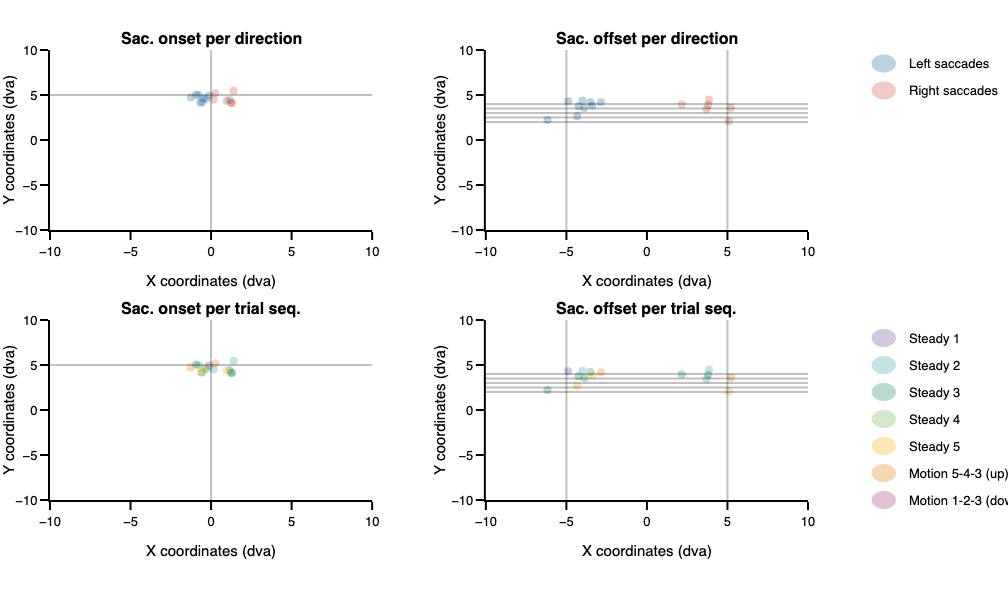

In [145]:
# figure specific settings
subplot_titles = ('<b>Sac. onset per direction<b>', '<b>Sac. offset per direction<b>',
                  '<b>Sac. onset per trial seq.<b>', '<b>Sac. offset per trial seq.<b>',)

# subplot settings
rows, cols = 2, 2
leg_mergin = 200
fig_height, fig_width = 600,300*2+leg_mergin
column_widths,row_heights = [1,1],[1,1]
sb_specs = [[{},{}],[{},{}]]
fig = make_subplots(rows=rows, cols=cols, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.15, 
                    column_widths=column_widths, row_heights=row_heights, subplot_titles=subplot_titles)

x_legend = 1.13
y_legend_step = 0.06
y_legend_sd = 0.97
y_legend_ts = 0.36
rad_leg = 0.04

# Right / Left saccades
# ---------------------
for sd_num, sd in enumerate(sds):

    
    # plot
    df_cond = df_all.loc[(df_all.main_sac_trial == 1) & (df_all.saccade_direction == sd_num+1)]
    fig.append_trace(go.Scatter(x=df_cond['sac_x_onset_trial']-df_cond['jitter_x_trial'],
                                y=df_cond['sac_y_onset_trial']-df_cond['jitter_y_trial'],
                                name=sd, mode='markers',marker_color=sd_cols[sd_num],marker_size=8,marker_opacity=0.3,
                                marker_line_width=0,marker_symbol='circle'),row=1, col=1)
    
    fig.append_trace(go.Scatter(x=df_cond['sac_x_offset_trial']-df_cond['jitter_x_trial'],
                                y=df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial'],
                                name=sd, mode='markers',marker_color=sd_cols[sd_num],marker_size=8,marker_opacity=0.3,
                                marker_line_width=0,marker_symbol='circle'),row=1, col=2)
    
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_sd-y_legend_step*sd_num, 
                       text=sd, showarrow=False, font_size = template_specs['axes_font_size'],xanchor = 'left', yanchor='middle')
    fig.add_shape(type='circle',xref='paper', yref='paper', fillcolor=sd_cols[sd_num],line_width=0, opacity=0.3,
                  x0=x_legend-0.03-rad_leg/2.5, y0=y_legend_sd-y_legend_step*sd_num-rad_leg/2, 
                  x1=x_legend-0.03+rad_leg/2.5, y1=y_legend_sd-y_legend_step*sd_num+rad_leg/2)

# ref lines
fig.add_hline(y=5,opacity=0.25, row=1, col=1)
fig.add_vline(x=0,opacity=0.25, row=1, col=1)
fig.add_vline(x=-5, opacity=0.25, row=1, col=2)
fig.add_vline(x=5,  opacity=0.25, row=1, col=2)
fig.add_hline(y=4,  opacity=0.25, row=1, col=2)
fig.add_hline(y=3.5,opacity=0.25, row=1, col=2)
fig.add_hline(y=3,  opacity=0.25, row=1, col=2)
fig.add_hline(y=2.5,opacity=0.25, row=1, col=2)
fig.add_hline(y=2,  opacity=0.25, row=1, col=2)
    
    
# Trials sequence
# ---------------
for ts_num, ts in enumerate(tss):
    # plot
    df_cond = df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)]
    fig.append_trace(go.Scatter(x=df_cond['sac_x_onset_trial']-df_cond['jitter_x_trial'],
                                y=df_cond['sac_y_onset_trial']-df_cond['jitter_y_trial'],
                                name=ts, mode='markers',marker_color=ts_cols[ts_num],marker_size=8,marker_opacity=0.3,
                                marker_line_width=0,marker_symbol='circle'),row=2, col=1)

    fig.append_trace(go.Scatter(x=df_cond['sac_x_offset_trial']-df_cond['jitter_x_trial'],
                                y=df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial'],
                                name=ts, mode='markers',marker_color=ts_cols[ts_num],marker_size=8,marker_opacity=0.3,
                                marker_line_width=0,marker_symbol='circle'),row=2, col=2)
    
    # legend
    fig.add_annotation(xref='paper', yref='paper', x=x_legend, y=y_legend_ts-(y_legend_step*ts_num), 
                       text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
    fig.add_shape(type='circle',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0, opacity=0.3,
                  x0=x_legend-0.03-rad_leg/2.5, y0=y_legend_ts-y_legend_step*ts_num-rad_leg/2, 
                  x1=x_legend-0.03+rad_leg/2.5, y1=y_legend_ts-y_legend_step*ts_num+rad_leg/2)


# ref lines
fig.add_hline(y=5,opacity=0.25, row=2, col=1)
fig.add_vline(x=0,opacity=0.25, row=2, col=1)
fig.add_vline(x=-5, opacity=0.25, row=2, col=2)
fig.add_vline(x=5,  opacity=0.25, row=2, col=2)
fig.add_hline(y=4,  opacity=0.25, row=2, col=2)
fig.add_hline(y=3.5,opacity=0.25, row=2, col=2)
fig.add_hline(y=3,  opacity=0.25, row=2, col=2)
fig.add_hline(y=2.5,opacity=0.25, row=2, col=2)
fig.add_hline(y=2,  opacity=0.25, row=2, col=2)    
    
# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[-10,10], title='X coordinates (dva)', row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[-10,10], title='Y coordinates (dva)',row=row+1, col=col+1)
    
fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=50, margin_r=leg_mergin, margin_t=50, margin_b=100, barmode='stack', showlegend=False)    
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)
fig.write_image('{}/{}_saccade_landing.pdf'.format(fig_dir, subject))

#### Sacade landing map per trial sequence

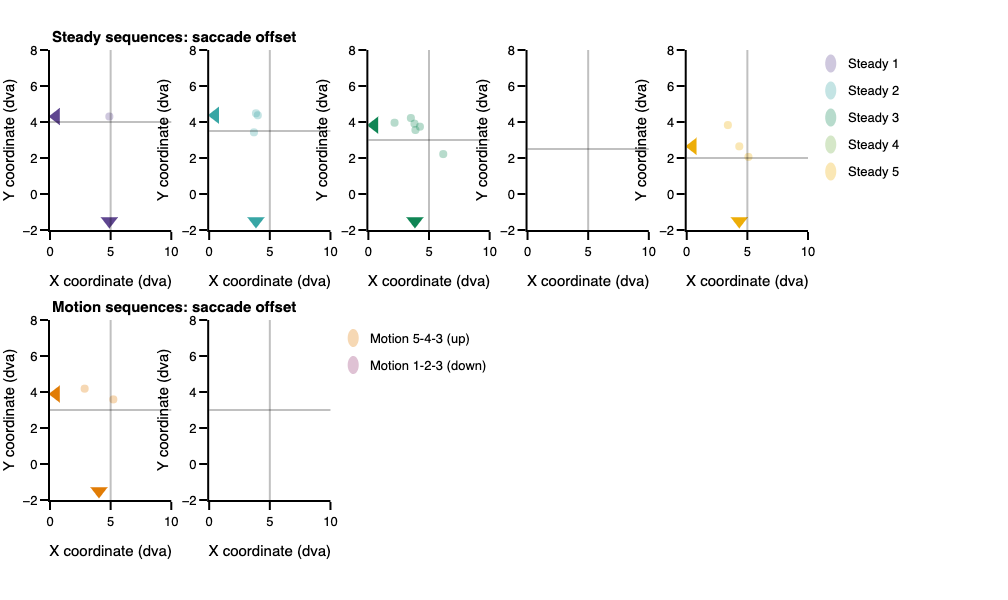

In [146]:
# subplot settings
rows, cols = 2, 5
leg_mergin = 200
fig_height, fig_width = 600,250*cols+leg_mergin
column_widths,row_heights = [1,1,1,1,1],[1,1]
sb_specs = [[{},{},{},{},{}],[{},{},{},{},{}]]
fig = make_subplots(rows=rows, cols=cols, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.05, 
                    column_widths=column_widths, row_heights=row_heights)

x_legend_top = 1.05
x_legend_bot = 0.42
y_legend_step = 0.06
y_legend_top = 0.97
y_legend_bot = 0.36
rad_leg = 0.04

# Trials sequence
# ---------------
for ts_num, ts in enumerate(tss):
    # row/col selection
    if ts_num == 0:   row_val, col_val, y_line = 1, 1, 4
    elif ts_num == 1: row_val, col_val, y_line = 1, 2, 3.5
    elif ts_num == 2: row_val, col_val, y_line = 1, 3, 3
    elif ts_num == 3: row_val, col_val, y_line = 1, 4, 2.5
    elif ts_num == 4: row_val, col_val, y_line = 1, 5, 2
    elif ts_num == 5: row_val, col_val, y_line = 2, 1, 3
    elif ts_num == 6: row_val, col_val, y_line = 2, 2, 3
        
    # plot
    df_cond = df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == ts_num+1)] 
    fig.append_trace(go.Scatter(x=(df_cond['sac_x_offset_trial']-df_cond['jitter_x_trial']).abs(),
                                y=df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial'],
                                name=ts, mode='markers',marker_color=ts_cols[ts_num],marker_size=8,marker_opacity=0.3,
                                marker_line_width=0,marker_symbol='circle'),row=row_val, col=col_val)
    
    # median
    fig.append_trace(go.Scatter(x=np.array(0.5),
                                y=np.array((df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial']).median()),
                                name=ts, mode='markers',marker_color=ts_cols[ts_num],marker_size=15,
                                marker_line_width=0,marker_symbol='triangle-left'),row=row_val, col=col_val)
    fig.append_trace(go.Scatter(x=np.array((df_cond['sac_x_offset_trial']-df_cond['jitter_x_trial']).abs().median()),
                                y=np.array(-1.5),
                                name=ts, mode='markers',marker_color=ts_cols[ts_num],marker_size=15,
                                marker_line_width=0,marker_symbol='triangle-down'),row=row_val, col=col_val)
    
    # legend
    if ts_num < 5:
        fig.add_annotation(xref='paper', yref='paper', x=x_legend_top, y=y_legend_top-(y_legend_step*ts_num), 
                           text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
        fig.add_shape(type='circle',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0, opacity=0.3,
                      x0=x_legend_top-0.02-rad_leg/5.5, y0=y_legend_top-y_legend_step*ts_num-rad_leg/2, 
                      x1=x_legend_top-0.02+rad_leg/5.5, y1=y_legend_top-y_legend_step*ts_num+rad_leg/2)
    else:
        fig.add_annotation(xref='paper', yref='paper', x=x_legend_bot, y=y_legend_bot-(y_legend_step*(ts_num-5)), 
                           text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
        fig.add_shape(type='circle',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0, opacity=0.3,
                      x0=x_legend_bot-0.02-rad_leg/5.5, y0=y_legend_bot-y_legend_step*(ts_num-5)-rad_leg/2, 
                      x1=x_legend_bot-0.02+rad_leg/5.5, y1=y_legend_bot-y_legend_step*(ts_num-5)+rad_leg/2)

    # legend line
    fig.add_vline(x=5, opacity=0.25, row=row_val, col=col_val)
    fig.add_hline(y=y_line, opacity=0.25, row=row_val, col=col_val)

# Figure title
fig.add_annotation(xref='paper', yref='paper', x=0, y=1.03, text='<b>Steady sequences: saccade offset<b>', 
                   showarrow=False, font_size = template_specs['title_font_size'], xanchor = 'left', yanchor='middle')
fig.add_annotation(xref='paper', yref='paper', x=0, y=0.43, text='<b>Motion sequences: saccade offset<b>',  
                   showarrow=False, font_size = template_specs['title_font_size'], xanchor = 'left', yanchor='middle')

#x axes settings
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[0,10], title='X coordinate (dva)', row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[-2,8], title='Y coordinate (dva)',row=row+1, col=col+1)

fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=50, margin_r=leg_mergin, margin_t=50, margin_b=100, barmode='stack', showlegend=False)    
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)
fig.write_image('{}/{}_saccade_landing_sequence.pdf'.format(fig_dir, subject))

#### Saccade y landing distribution

In [147]:
# subplot settings
rows, cols = 2, 2
leg_mergin = 200
fig_height, fig_width = 600,500*cols+leg_mergin
column_widths,row_heights = [1,1],[1,1]
sb_specs = [[{},{}],[{},{}]]
fig = make_subplots(rows=rows, cols=cols, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.08, 
                    column_widths=column_widths, row_heights=row_heights)

x_range = [-2,9]
x_range_norm = [-1,2]
y_range = [0,1]
x_gauss = np.linspace(x_range[0], x_range[1], 100)
x_gauss_norm = np.linspace(x_range_norm[0], x_range_norm[1], 100)

# Figure title
fig.add_annotation(xref='paper', yref='paper', x=0, y=1.03, text='<b>Steady sequences: vertical saccade offset (real & corrected)<b>', 
                   showarrow=False, font_size = template_specs['title_font_size'], xanchor = 'left', yanchor='middle')
fig.add_annotation(xref='paper', yref='paper', x=0, y=0.43, text='<b>Motion sequences: vertical saccade offset (real & corrected)<b>',  
                   showarrow=False, font_size = template_specs['title_font_size'], xanchor = 'left', yanchor='middle')

# compute values corrected in space as a function of steady condition
# 1. fit gaussian on steady condition
mu_steady, sigma_steady = np.zeros(5), np.zeros(5)
for steady_seq in np.arange(0,5):
    df_steady = df_all.loc[(df_all.main_sac_trial == 1) & (df_all.trial_sequence == steady_seq+1)]
    mu_steady[steady_seq], sigma_steady[steady_seq] = norm.fit(df_steady['sac_y_offset_trial']-df_steady['jitter_y_trial'])

# 2. fit linear regression between 5 values
real_steady = np.array([4, 3.5, 3, 2.5, 2])
slope, intercept, r, p, se = linregress(real_steady, mu_steady)

# 3. normalize values between regressed min and max value
min_norm, max_norm = intercept + slope*real_steady[4], intercept + slope*real_steady[0]
range_norm = max_norm-min_norm
val_to_norm = df_all['sac_y_offset_trial']-df_all['jitter_y_trial']
norm_val = (val_to_norm-min_norm)/range_norm

# 3. put values in between presented min and max real y value 
corrected_val = (norm_val*real_steady[4])+(real_steady[0]-real_steady[4])
df_all = df_all.assign(corrected_y_offset=corrected_val)

for ts_num, ts in enumerate(tss):
    # row/col and data selection
    if ts_num == 0:   row_val, y_line = 1, 4
    elif ts_num == 1: row_val, y_line = 1, 3.5
    elif ts_num == 2: row_val, y_line = 1, 3
    elif ts_num == 3: row_val, y_line = 1, 2.5
    elif ts_num == 4: row_val, y_line = 1, 2
    elif ts_num == 5: row_val, y_line = 2, 3
    elif ts_num == 6: row_val, y_line = 2, 3

    df_cond = df_all.loc[(df_all.main_sac_trial == 1) & 
                         (df_all.trial_sequence == ts_num+1)
                                ] 
        
    # plot
    fig.append_trace(go.Histogram(x=df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial'],
                                  name=ts,
                                  marker_color=ts_cols[ts_num], 
                                  marker_opacity=0.3, histnorm='probability density',
                                  xbins_size = 0.25),row=row_val, col=1)
    fig.append_trace(go.Histogram(x=df_cond.corrected_y_offset,
                                  name=ts,
                                  marker_color=ts_cols[ts_num], 
                                  marker_opacity=0.3, histnorm='probability density',
                                  xbins_size = 0.25),row=row_val, col=2)

    # fit and plot gaussian
    (mu, sigma) = norm.fit(df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial'])
    y_gauss = norm.pdf(x_gauss,mu,sigma)
    fig.append_trace(go.Scatter(x=x_gauss,
                                y=y_gauss,
                                mode='lines', line_color=ts_cols[ts_num], 
                                marker_line_width=0,marker_symbol='circle'),row=row_val, col=1)
    
    (mu_norm, sigma_norm) = norm.fit(df_cond.corrected_y_offset)
    y_gauss_norm = norm.pdf(x_gauss,mu_norm,sigma_norm)
    fig.append_trace(go.Scatter(x=x_gauss,
                                y=y_gauss_norm,
                                mode='lines', line_color=ts_cols[ts_num], 
                                marker_line_width=0,marker_symbol='circle'),row=row_val, col=2)
    
    # legend
    if ts_num < 5:
        fig.add_annotation(xref='paper', yref='paper', x=x_legend_top, y=y_legend_top-(y_legend_step*ts_num), 
                           text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
        fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0, opacity=0.3,
                      x0=x_legend_top-0.025-rad_leg/4, y0=y_legend_top-y_legend_step*ts_num-rad_leg/2, 
                      x1=x_legend_top-0.025+rad_leg/4, y1=y_legend_top-y_legend_step*ts_num+rad_leg/2)
    else:
        fig.add_annotation(xref='paper', yref='paper', x=x_legend_top, y=y_legend_bot-(y_legend_step*(ts_num-5)), 
                           text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
        fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0, opacity=0.3,
                      x0=x_legend_top-0.025-rad_leg/4, y0=y_legend_bot-y_legend_step*(ts_num-5)-rad_leg/2, 
                      x1=x_legend_top-0.025+rad_leg/4, y1=y_legend_bot-y_legend_step*(ts_num-5)+rad_leg/2)

    fig.add_vline(x=y_line, opacity=0.25, row=row_val, col=1)
    fig.add_vline(x=y_line, opacity=0.25, row=row_val, col=2)
    
# axes settings
for row in np.arange(rows):
    for col in np.arange(cols):                    
        if col == 0: x_title = 'Y coordinate (dva)'
        elif col == 1: x_title = 'Y corrected coordinate (dva)'
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=x_range, title=x_title, row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=y_range, title='Probability (%)',row=row+1, col=col+1)

fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=50, margin_r=leg_mergin, margin_t=50, margin_b=100, showlegend=False, barmode='overlay')
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)
fig.write_image('{}/{}_vertical_saccade_landing_sequence.pdf'.format(fig_dir, subject))

/opt/jupyterlab/lab_env/fmri_lab/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:366: RuntimeWarning:

Mean of empty slice.

/opt/jupyterlab/lab_env/fmri_lab/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars

/opt/jupyterlab/lab_env/fmri_lab/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:371: RuntimeWarning:

Mean of empty slice.

/opt/jupyterlab/lab_env/fmri_lab/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning:

divide by zero encountered in true_divide



RuntimeError: The data contains non-finite values.

#### Saccade y landing distribution per incremental runs

In [ ]:
# subplot settings
rows, cols = 2, 2
leg_mergin = 200
fig_height, fig_width = 600,500*cols+leg_mergin
column_widths,row_heights = [1,1],[1,1]
sb_specs = [[{},{}],[{},{}]]
fig = make_subplots(rows=rows, cols=cols, print_grid=False, vertical_spacing=0.2, horizontal_spacing=0.08, 
                    column_widths=column_widths, row_heights=row_heights)
opacity_val = 0.3
data_types = []
for run_num in np.arange(1,df_all.run_number.max()+1):
    data_types.append('{:1.0f} runs'.format(run_num))

# Figure title
fig.add_annotation(xref='paper', yref='paper', x=0, y=1.03, text='<b>Steady sequences: vertical saccade offset (gaussian mu/sigma)<b>', 
                   showarrow=False, font_size = template_specs['title_font_size'], xanchor = 'left', yanchor='middle')
fig.add_annotation(xref='paper', yref='paper', x=0, y=0.43, text='<b>Motion sequences: vertical saccade offset (gaussian mu/sigma)<b>',  
                   showarrow=False, font_size = template_specs['title_font_size'], xanchor = 'left', yanchor='middle')

    
for ts_num, ts in enumerate(tss):
    # row/col and data selection
    if ts_num == 0:   row_val, y_line = 1, 4
    elif ts_num == 1: row_val, y_line = 1, 3.5
    elif ts_num == 2: row_val, y_line = 1, 3
    elif ts_num == 3: row_val, y_line = 1, 2.5
    elif ts_num == 4: row_val, y_line = 1, 2
    elif ts_num == 5: row_val, y_line = 2, 3
    elif ts_num == 6: row_val, y_line = 2, 3
    
    # compute mu, sigma, nb of trials
    mu_y, sigma_y, nb_y = np.zeros(df_all.run_number.max()),np.zeros(df_all.run_number.max()),np.zeros(df_all.run_number.max())
    for run_num in np.arange(df_all.run_number.max()):
        df_cond = df_all.loc[(df_all.main_sac_trial == 1) & 
                             (df_all.trial_sequence == ts_num+1) & (df_all.run_number <= run_num+1)]
        (mu_y[run_num], sigma_y[run_num]) = norm.fit(df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial'])
        nb_y[run_num] = (df_cond['sac_y_offset_trial']-df_cond['jitter_y_trial']).shape[0]
        
    # draw data
    fig.append_trace(go.Bar(x=data_types,y=nb_y,
                            marker_color=ts_cols[ts_num]),row=row_val, col=1)
    
    fig.append_trace(go.Scatter(x=data_types, y=mu_y,
                                name=ts, mode='markers+lines',marker_color=ts_cols[ts_num],marker_size=8,
                                marker_line_width=0,marker_symbol='circle'),row=row_val, col=2)
    
    fig.append_trace(go.Scatter(x=data_types, y=mu_y+sigma_y,
                                mode='lines',line_width=0,line_color=ts_cols[ts_num]),row=row_val, col=2)
    
    fig.append_trace(go.Scatter(x=data_types, y=mu_y-sigma_y,fillcolor="rgba({}, {})".format(ts_cols[ts_num][4:-1],opacity_val),
                                mode='lines',line_width=0,line_color=ts_cols[ts_num], fill='tonexty'),row=row_val, col=2)

    # legend
    if ts_num < 5:
        fig.add_annotation(xref='paper', yref='paper', x=x_legend_top, y=y_legend_top-(y_legend_step*ts_num), 
                           text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
        fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0,
                      x0=x_legend_top-0.025-rad_leg/4, y0=y_legend_top-y_legend_step*ts_num-rad_leg/2, 
                      x1=x_legend_top-0.025+rad_leg/4, y1=y_legend_top-y_legend_step*ts_num+rad_leg/2)
    else:
        fig.add_annotation(xref='paper', yref='paper', x=x_legend_top, y=y_legend_bot-(y_legend_step*(ts_num-5)), 
                           text=ts, showarrow=False, font_size = template_specs['axes_font_size'], xanchor = 'left', yanchor='middle')
        fig.add_shape(type='rect',xref='paper', yref='paper', fillcolor=ts_cols[ts_num],line_width=0,
                      x0=x_legend_top-0.025-rad_leg/4, y0=y_legend_bot-y_legend_step*(ts_num-5)-rad_leg/2, 
                      x1=x_legend_top-0.025+rad_leg/4, y1=y_legend_bot-y_legend_step*(ts_num-5)+rad_leg/2)
    

for row in np.arange(rows):
    for col in np.arange(cols):
        if col==1:
            fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], categoryorder='array', categoryarray=data_types, row=row+1, col=col+1)
            fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[0,6], title='Y coordinates (dva)',row=row+1, col=col+1)
        elif col==0:
            fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], categoryorder='array', categoryarray=data_types, row=row+1, col=col+1)
            fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], range=[0,250], title='Trials',row=row+1, col=col+1)

fig.layout.update(template=fig_template, width=fig_width, height=fig_height, margin_l=50, margin_r=leg_mergin, margin_t=50, margin_b=100, showlegend=False)
fig.show()
if not os.path.exists(fig_dir):os.mkdir(fig_dir)
fig.write_image('{}/{}_vertical_saccade_landing_sequence_runs.pdf'.format(fig_dir, subject))